In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt

### Import Data

In [52]:
df = pd.read_csv('tracks.csv')

In [53]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [54]:
df.shape

(586672, 20)

### X, Y Variables

In [55]:
y_train = df['popularity']

X_train = df.drop(['id', 'name', 'popularity', 'artists', 'id_artists', 'release_date'], axis=1)

### Random Forrest Regressor

In [56]:
rfr_pipeline = Pipeline([('rfr', RandomForestRegressor())])

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid_params = {'rfr__n_estimators': [5], 
               'rfr__max_depth': [5]} 
grid_model = GridSearchCV(rfr_pipeline, grid_params, n_jobs = -1)
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('rfr', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rfr__max_depth': [5], 'rfr__n_estimators': [5]})

### Generate Feature Importance

In [59]:
importance = grid_model.best_estimator_._final_estimator.feature_importances_

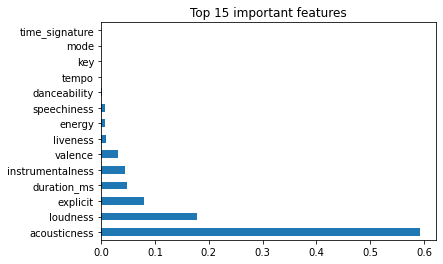

In [60]:
importance = pd.Series(grid_model.best_estimator_._final_estimator.feature_importances_, index=X_train.columns)
importance.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()